In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Data Import, Understanding and Cleaning

## 1.1 Understand the dataset
1. shape
2. columns' name
3. data types

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
(df_train['GrLivArea']>4000).sum()

df_train = df_train[df_train.GrLivArea < 4000]
print(df_train.shape)

(1456, 81)


## 1.2 Check null and missing value in your data
Steps: 
1. use null to check value
2. get null columns name
3. get null data types

<AxesSubplot:>

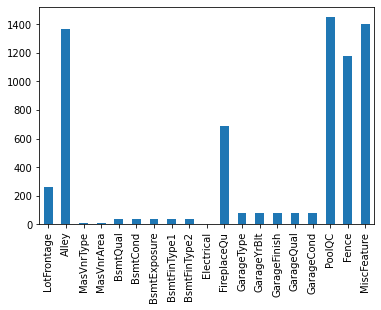

In [6]:
null_sum = df_train.isnull().sum()
null_sum[null_sum > 0].plot.bar()

In [7]:
null_columns = list(pd.DataFrame(null_sum[null_sum > 0]).index)

In [8]:
df_train[null_columns].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [9]:
print(df_train.SalePrice)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1456, dtype: int64


In [10]:
df_train.SalePrice = np.log1p(df_train.SalePrice)
y = df_train.SalePrice
print(y)

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1456, dtype: float64


## 1.3 Replace NAN value to mean
- float64 type use .mean()
- object use .mode()[0]
- do the same for test set

In [11]:
for c in null_columns:
    if df_train[c].dtype == 'object':
        df_train[c] = df_train[[c]].replace(np.NAN, df_train[c].mode()[0])
    else:
        df_train[c] = df_train[c].replace(np.NAN, df_train[c].mean())

In [12]:
print(df_train.isnull().sum()[df_train.isnull().sum() > 0])

Series([], dtype: int64)


In [13]:
df_test = pd.read_csv('test.csv')
null_sum = df_test.isnull().sum()
null_columns = list(pd.DataFrame(null_sum[null_sum > 0]).index)

for c in null_columns:
    if df_test[c].dtype == 'object':
        df_test[c] = df_test[[c]].replace(np.NAN, df_test[c].mode()[0])
    else:
        df_test[c] = df_test[c].replace(np.NAN, df_test[c].mean())
        
print(df_test.isnull().sum()[df_test.isnull().sum() > 0])

Series([], dtype: int64)


## 1.4 Understand catergorical (quanlitative) and numerical (quantitative) data
1. extract quantitative and qualitative
2. study quantitative
3. study quanlitative

### 1.4.1 Extract quantitative and qualitative

In [14]:
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

quantitative.sort()
qualitative.sort()

print('Quantitative:', quantitative)
print('\nQualitative:', qualitative)

Quantitative: ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']

Qualitative: ['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighbo

### 1.4.2 Study Quantitative

## 1.5 Study Correlation 
1. most important data -> sale price
2. study correlation of sale price towards other data

In [15]:
df_train['SalePrice'].describe()

count    1456.000000
mean       12.021950
std         0.396077
min        10.460271
25%        11.774528
50%        12.001512
75%        12.273736
max        13.345509
Name: SalePrice, dtype: float64

<AxesSubplot:>

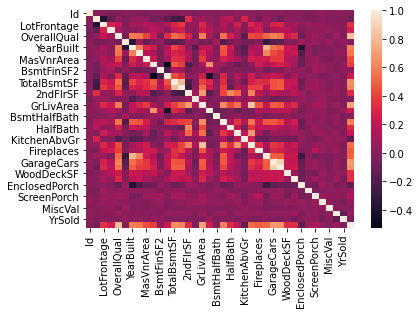

In [16]:
corr = df_train.corr()
sb.heatmap(corr)

In [17]:
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice.head(11)

SalePrice       1.000000
OverallQual     0.819240
GrLivArea       0.718844
GarageCars      0.680408
GarageArea      0.655212
TotalBsmtSF     0.641553
1stFlrSF        0.613742
FullBath        0.590919
YearBuilt       0.588977
YearRemodAdd    0.568986
TotRmsAbvGrd    0.533446
Name: SalePrice, dtype: float64

In [18]:
top10 = [f for f in corr.SalePrice.index[0:11]]
new_df = pd.DataFrame(data=df_train, columns=top10)
new_df.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd
0,12.247699,7,1710,2,548,856,856,2,2003,2003,8
1,12.109016,6,1262,2,460,1262,1262,2,1976,1976,6
2,12.317171,7,1786,2,608,920,920,2,2001,2002,6
3,11.849405,7,1717,3,642,756,961,1,1915,1970,7
4,12.429220,8,2198,3,836,1145,1145,2,2000,2000,9


In [19]:
# pd.DataFrame?

In [20]:
[f for f in new_df.columns if f in qualitative]

[]

In [21]:
[f for f in new_df.columns if f in quantitative]

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd']

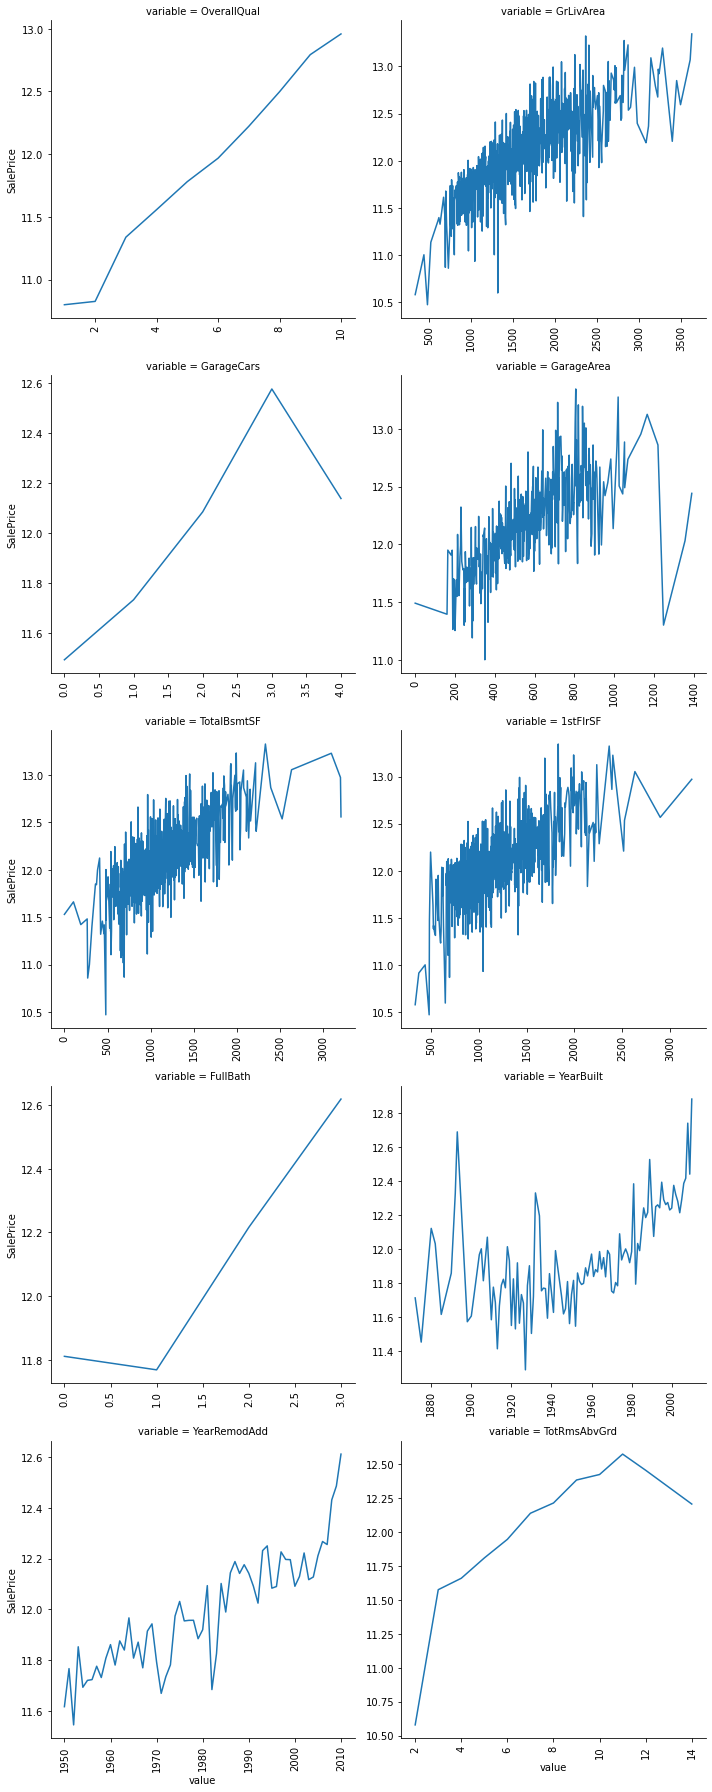

In [22]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)

f = pd.melt(new_df, id_vars=['SalePrice'], value_vars=[f for f in new_df.columns])
g = sb.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(pairplot, "value", "SalePrice")

## 1.6 Polynomial Features
add each feature's polynomial of 2 and 3

In [23]:
#2nd polynomial
for c in new_df.columns.drop('SalePrice'):
    new_df[c + '_s2'] = new_df[c] ** 2
    new_df[c + '_s3'] = new_df[c] ** 3
    new_df[c + '_sqrt'] = np.sqrt(new_df[c])

In [24]:
print(new_df.columns)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
       'TotRmsAbvGrd', 'OverallQual_s2', 'OverallQual_s3', 'OverallQual_sqrt',
       'GrLivArea_s2', 'GrLivArea_s3', 'GrLivArea_sqrt', 'GarageCars_s2',
       'GarageCars_s3', 'GarageCars_sqrt', 'GarageArea_s2', 'GarageArea_s3',
       'GarageArea_sqrt', 'TotalBsmtSF_s2', 'TotalBsmtSF_s3',
       'TotalBsmtSF_sqrt', '1stFlrSF_s2', '1stFlrSF_s3', '1stFlrSF_sqrt',
       'FullBath_s2', 'FullBath_s3', 'FullBath_sqrt', 'YearBuilt_s2',
       'YearBuilt_s3', 'YearBuilt_sqrt', 'YearRemodAdd_s2', 'YearRemodAdd_s3',
       'YearRemodAdd_sqrt', 'TotRmsAbvGrd_s2', 'TotRmsAbvGrd_s3',
       'TotRmsAbvGrd_sqrt'],
      dtype='object')


In [25]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

In [26]:
new_df = new_df.drop(columns=['SalePrice'])
new_df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,...,FullBath_sqrt,YearBuilt_s2,YearBuilt_s3,YearBuilt_sqrt,YearRemodAdd_s2,YearRemodAdd_s3,YearRemodAdd_sqrt,TotRmsAbvGrd_s2,TotRmsAbvGrd_s3,TotRmsAbvGrd_sqrt
0,7,1710,2,548,856,856,2,2003,2003,8,...,1.414214,4012009,8036054027,44.754888,4012009,8036054027,44.754888,64,512,2.828427
1,6,1262,2,460,1262,1262,2,1976,1976,6,...,1.414214,3904576,7715442176,44.452222,3904576,7715442176,44.452222,36,216,2.449490
2,7,1786,2,608,920,920,2,2001,2002,6,...,1.414214,4004001,8012006001,44.732538,4008004,8024024008,44.743715,36,216,2.449490
3,7,1717,3,642,756,961,1,1915,1970,7,...,1.000000,3667225,7022735875,43.760713,3880900,7645373000,44.384682,49,343,2.645751
4,8,2198,3,836,1145,1145,2,2000,2000,9,...,1.414214,4000000,8000000000,44.721360,4000000,8000000000,44.721360,81,729,3.000000


In [27]:
print(f'Total numbers of features : {new_df.shape[1]}')

Total numbers of features : 40


In [28]:
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size = 0.3, random_state = 0)
print(f'X_train : {X_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_test : {y_test.shape}')

X_train : (1019, 40)
X_test : (437, 40)
y_train : (1019,)
y_test : (437,)


In [29]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

RMSE on Training set : 0.1542783856483705
RMSE on Test set : 0.15271740889440416


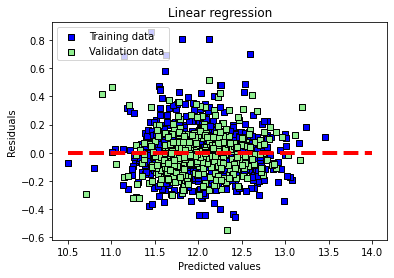

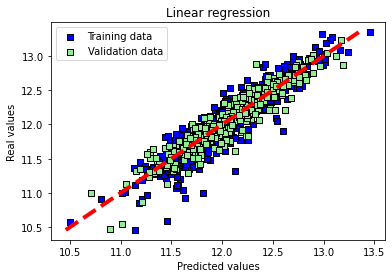

In [30]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data", edgecolors='black')
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data", edgecolors='black')
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y=0, xmin=10.5, xmax=14, color='red', linestyles='--', linewidth=4)
# plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data", edgecolors='black')
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data", edgecolors='black')
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=4)
plt.show()

# 2. Test set

In [31]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [32]:
print(f'Test dataset shape: {df_test.shape}')

Test dataset shape: (1459, 80)


In [33]:
df_test = pd.DataFrame(data=df_test, columns=top10[1:])
df_test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd
0,5,896,1.0,730.0,882.0,896,1,1961,1961,5
1,6,1329,1.0,312.0,1329.0,1329,1,1958,1958,6
2,5,1629,2.0,482.0,928.0,928,2,1997,1998,6
3,6,1604,2.0,470.0,926.0,926,2,1998,1998,7
4,8,1280,2.0,506.0,1280.0,1280,2,1992,1992,5


<AxesSubplot:>

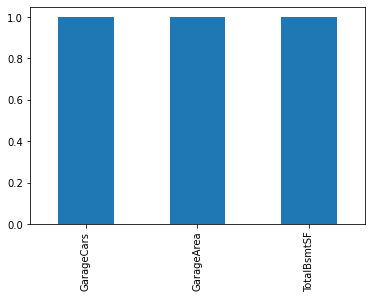

In [34]:
null_sum = df_test.isnull().sum()
null_sum[null_sum > 0].plot.bar()

In [35]:
null_columns = list(pd.DataFrame(null_sum[null_sum > 0]).index)

for c in null_columns:
    if df_test[c].dtype == 'object':
        df_test[c] = df_test[[c]].replace(np.NAN, df_test[c].mode()[0])
    else:
        df_test[c] = df_test[c].replace(np.NAN, df_test[c].mean())
        
print(df_test.isnull().sum()[df_test.isnull().sum() > 0])

Series([], dtype: int64)


In [36]:
for c in df_test.columns:
    df_test[c + '_s2'] = df_test[c] ** 2
    df_test[c + '_s3'] = df_test[c] ** 3
    df_test[c + '_sqrt'] = np.sqrt(df_test[c])

In [37]:
print(df_test.columns)

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd',
       'OverallQual_s2', 'OverallQual_s3', 'OverallQual_sqrt', 'GrLivArea_s2',
       'GrLivArea_s3', 'GrLivArea_sqrt', 'GarageCars_s2', 'GarageCars_s3',
       'GarageCars_sqrt', 'GarageArea_s2', 'GarageArea_s3', 'GarageArea_sqrt',
       'TotalBsmtSF_s2', 'TotalBsmtSF_s3', 'TotalBsmtSF_sqrt', '1stFlrSF_s2',
       '1stFlrSF_s3', '1stFlrSF_sqrt', 'FullBath_s2', 'FullBath_s3',
       'FullBath_sqrt', 'YearBuilt_s2', 'YearBuilt_s3', 'YearBuilt_sqrt',
       'YearRemodAdd_s2', 'YearRemodAdd_s3', 'YearRemodAdd_sqrt',
       'TotRmsAbvGrd_s2', 'TotRmsAbvGrd_s3', 'TotRmsAbvGrd_sqrt'],
      dtype='object')


In [38]:
test_pred = lr.predict(df_test)

In [39]:
print(test_pred.shape)

(1459,)


In [40]:
print(test_pred)

[11.66801365 11.92055396 12.04529619 ... 11.95882339 11.64114754
 12.33807244]


In [41]:
print(np.expm1(test_pred))

[116775.09357068 150323.85971015 170295.4786922  ... 156188.20219835
 113679.54325701 228220.61611019]


In [42]:
pred = np.expm1(test_pred)

In [45]:
pred.shape

(1459,)

In [50]:
df_test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,...,FullBath_sqrt,YearBuilt_s2,YearBuilt_s3,YearBuilt_sqrt,YearRemodAdd_s2,YearRemodAdd_s3,YearRemodAdd_sqrt,TotRmsAbvGrd_s2,TotRmsAbvGrd_s3,TotRmsAbvGrd_sqrt
0,5,896,1.0,730.0,882.0,896,1,1961,1961,5,...,1.000000,3845521,7541066681,44.283180,3845521,7541066681,44.283180,25,125,2.236068
1,6,1329,1.0,312.0,1329.0,1329,1,1958,1958,6,...,1.000000,3833764,7506509912,44.249294,3833764,7506509912,44.249294,36,216,2.449490
2,5,1629,2.0,482.0,928.0,928,2,1997,1998,6,...,1.414214,3988009,7964053973,44.687806,3992004,7976023992,44.698993,36,216,2.449490
3,6,1604,2.0,470.0,926.0,926,2,1998,1998,7,...,1.414214,3992004,7976023992,44.698993,3992004,7976023992,44.698993,49,343,2.645751
4,8,1280,2.0,506.0,1280.0,1280,2,1992,1992,5,...,1.414214,3968064,7904383488,44.631827,3968064,7904383488,44.631827,25,125,2.236068


In [51]:
submission = pd.concat([pd.read_csv('test.csv').Id, pd.DataFrame(pred, columns=['SalePrice'])], axis=1)

In [55]:
submission.head()

,Id,SalePrice
0,1461,116775.093571
1,1462,150323.859710
2,1463,170295.478692
3,1464,182383.113704
4,1465,203187.242069


In [56]:
submission.to_csv('Prediction1.csv',index=False)

In [57]:
pd.read_csv('Prediction1.csv').head()

,Id,SalePrice
0,1461,116775.093571
1,1462,150323.859710
2,1463,170295.478692
3,1464,182383.113704
4,1465,203187.242069
